In [2]:
import pandas as pd
import numpy as np
import cv2
import os,sys
from tqdm import tqdm
from PIL import Image
import matplotlib.pyplot as plt

In [3]:
train = pd.read_csv('train.csv')
test = pd.read_csv('test.csv')

In [3]:
train.head()

,Images,Class
0,4,Attire
1,7,misc
2,10,Food
3,11,Decorationandsignage
4,13,Decorationandsignage


In [4]:
train['Images'] = 'image'+train['Images'].astype(str)+'.jpg'

In [5]:
train.head()

,Images,Class
0,image4.jpg,Attire
1,image7.jpg,misc
2,image10.jpg,Food
3,image11.jpg,Decorationandsignage
4,image13.jpg,Decorationandsignage


In [6]:
train['Images'].values[1]

'image7.jpg'

In [7]:
test.head()

,Images
0,22
1,37
2,40
3,54
4,63


In [8]:
test['Images'] = 'image'+test['Images'].astype(str)+'.jpg'

In [9]:
test.head()

,Images
0,image22.jpg
1,image37.jpg
2,image40.jpg
3,image54.jpg
4,image63.jpg


In [10]:
#function to read image
def read_img(img_path):
    img = cv2.imread(img_path,cv2.IMREAD_COLOR)
    img = cv2.resize(img,(256,256))
    return img

In [11]:
TRAIN_PATH = 'Train_Images/'
TEST_PATH = 'Test_Images/'

In [12]:
import glob
train_data = []
for t in train['Images'].values:
    for img in glob.glob(TRAIN_PATH+t):
        n= read_img(img)
        train_data.append(n)

In [13]:
import glob
test_data = []
for tt in test['Images'].values:
    for img in glob.glob(TEST_PATH+tt):
        n= read_img(img)
        test_data.append(n)

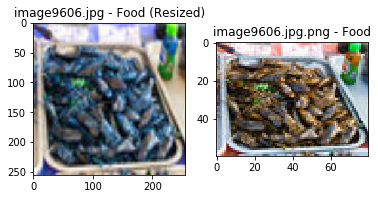

In [14]:
train_labels = train['Class'].values
i = np.random.choice(np.arange(len(train_data)))
#i=760
fig, ax = plt.subplots(nrows=1, ncols=2)

plt.subplot(1,2,1)
plt.title('{} - {} (Resized)'.format(train['Images'].values[i], train_labels[i]))
plt.imshow(train_data[i])
plt.subplot(1,2,2)
plt.title('{}.png - {}'.format(train['Images'].values[i], train_labels[i]))
plt.imshow(Image.open(TRAIN_PATH +'{}'.format(train.Images[i])))

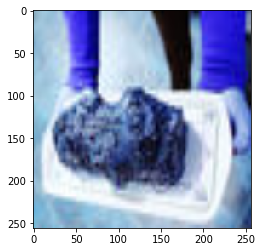

In [15]:
i = np.random.choice(np.arange(len(test_data)))
plt.imshow(test_data[i])

In [ ]:
# Scale the images
X_train = np.array(train_data, np.float32) / 255.
X_test = np.array(test_data, np.float32) / 255.

In [ ]:
# Encoding image labels into target variables (categorical)
from sklearn.preprocessing import LabelEncoder,OneHotEncoder
le = LabelEncoder()
y_train = le.fit_transform(train_labels)

ohe = OneHotEncoder(categories = 'auto')
y_train = ohe.fit_transform(y_train.reshape(-1,1)).toarray()

In [18]:
X_train.shape, y_train.shape

((5983, 256, 256, 3), (5983, 4))

# 8 Layer CNN

In [23]:
# Importing the Keras libraries and packages
import keras
from keras.models import Sequential
from keras.layers import *
from keras.optimizers import SGD
from keras.constraints import maxnorm
from keras.callbacks import EarlyStopping
from keras.preprocessing import image

In [25]:
model = Sequential()
model.add(Convolution2D(32, (3,3), activation='relu', padding='same',input_shape = (64,64,3)))
model.add(Convolution2D(32, (3,3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2,2)))

model.add(Convolution2D(64, (3,3), activation='relu', padding='same'))
model.add(Convolution2D(64, (3,3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2,2)))
#model.add(Dropout(0.25))

model.add(Convolution2D(128, (3,3), activation='relu', padding='same'))
model.add(Convolution2D(128, (3,3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2,2)))
#model.add(Dropout(0.25))

model.add(Convolution2D(128, (3,3), activation='relu', padding='same'))
model.add(Convolution2D(128, (3,3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2,2)))

model.add(Flatten())
model.add(Dense(256, activation='relu'))
#model.add(Dropout(0.5))
model.add(Dense(128, activation='relu'))
model.add(Dropout(0.25))
model.add(Dense(y_train.shape[1], activation='softmax'))

In [26]:
opt = SGD(lr = 0.01)
model.compile(loss = 'categorical_crossentropy', optimizer = 'adam', metrics = ['accuracy'])

W0301 06:24:00.364203 11772 deprecation_wrapper.py:119] From D:\Anaconda\lib\site-packages\keras\optimizers.py:790: The name tf.train.Optimizer is deprecated. Please use tf.compat.v1.train.Optimizer instead.

W0301 06:24:00.408087 11772 deprecation_wrapper.py:119] From D:\Anaconda\lib\site-packages\keras\backend\tensorflow_backend.py:3295: The name tf.log is deprecated. Please use tf.math.log instead.



In [27]:

model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_9 (Conv2D)            (None, 64, 64, 32)        896       
_________________________________________________________________
conv2d_10 (Conv2D)           (None, 62, 62, 32)        9248      
_________________________________________________________________
max_pooling2d_5 (MaxPooling2 (None, 31, 31, 32)        0         
_________________________________________________________________
conv2d_11 (Conv2D)           (None, 31, 31, 64)        18496     
_________________________________________________________________
conv2d_12 (Conv2D)           (None, 29, 29, 64)        36928     
_________________________________________________________________
max_pooling2d_6 (MaxPooling2 (None, 14, 14, 64)        0         
_________________________________________________________________
conv2d_13 (Conv2D)           (None, 14, 14, 128)       73856     
__________

In [28]:
early_stops = EarlyStopping(patience=5, monitor='val_acc')

In [29]:
# Training the model
model.fit(X_train, y_train, batch_size=64, epochs=50, validation_split=0.25, callbacks=[early_stops])

W0301 06:24:52.491709 11772 deprecation.py:323] From C:\Users\KIIT\AppData\Roaming\Python\Python36\site-packages\tensorflow\python\ops\math_grad.py:1250: add_dispatch_support.<locals>.wrapper (from tensorflow.python.ops.array_ops) is deprecated and will be removed in a future version.
Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where


Train on 4487 samples, validate on 1496 samples
Epoch 1/50
4487/4487 [==============================] - ETA: 1:59 - loss: 1.3855 - acc: 0.250 - ETA: 1:28 - loss: 1.3733 - acc: 0.335 - ETA: 1:17 - loss: 1.3676 - acc: 0.359 - ETA: 1:12 - loss: 1.3649 - acc: 0.347 - ETA: 1:08 - loss: 1.3530 - acc: 0.356 - ETA: 1:06 - loss: 1.3484 - acc: 0.349 - ETA: 1:03 - loss: 1.3436 - acc: 0.343 - ETA: 1:02 - loss: 1.3307 - acc: 0.347 - ETA: 1:01 - loss: 1.3407 - acc: 0.343 - ETA: 59s - loss: 1.3423 - acc: 0.343 - ETA: 58s - loss: 1.3402 - acc: 0.35 - ETA: 57s - loss: 1.3413 - acc: 0.34 - ETA: 55s - loss: 1.3418 - acc: 0.34 - ETA: 54s - loss: 1.3429 - acc: 0.33 - ETA: 53s - loss: 1.3431 - acc: 0.34 - ETA: 52s - loss: 1.3424 - acc: 0.34 - ETA: 51s - loss: 1.3397 - acc: 0.34 - ETA: 50s - loss: 1.3400 - acc: 0.34 - ETA: 49s - loss: 1.3454 - acc: 0.34 - ETA: 48s - loss: 1.3440 - acc: 0.34 - ETA: 47s - loss: 1.3437 - acc: 0.34 - ETA: 46s - loss: 1.3435 - acc: 0.34 - ETA: 45s - loss: 1.3425 - acc: 0.35 - ETA

4487/4487 [==============================] - ETA: 1:00 - loss: 1.2258 - acc: 0.468 - ETA: 59s - loss: 1.2572 - acc: 0.390 - ETA: 58s - loss: 1.2616 - acc: 0.40 - ETA: 58s - loss: 1.2930 - acc: 0.36 - ETA: 57s - loss: 1.2803 - acc: 0.38 - ETA: 59s - loss: 1.2606 - acc: 0.40 - ETA: 1:01 - loss: 1.2556 - acc: 0.397 - ETA: 1:02 - loss: 1.2498 - acc: 0.404 - ETA: 1:00 - loss: 1.2520 - acc: 0.411 - ETA: 1:00 - loss: 1.2557 - acc: 0.404 - ETA: 59s - loss: 1.2581 - acc: 0.404 - ETA: 58s - loss: 1.2656 - acc: 0.39 - ETA: 57s - loss: 1.2700 - acc: 0.39 - ETA: 56s - loss: 1.2608 - acc: 0.40 - ETA: 55s - loss: 1.2580 - acc: 0.40 - ETA: 53s - loss: 1.2576 - acc: 0.40 - ETA: 52s - loss: 1.2584 - acc: 0.40 - ETA: 51s - loss: 1.2580 - acc: 0.40 - ETA: 49s - loss: 1.2596 - acc: 0.40 - ETA: 49s - loss: 1.2587 - acc: 0.40 - ETA: 48s - loss: 1.2541 - acc: 0.40 - ETA: 47s - loss: 1.2533 - acc: 0.40 - ETA: 46s - loss: 1.2505 - acc: 0.41 - ETA: 45s - loss: 1.2488 - acc: 0.41 - ETA: 44s - loss: 1.2489 - acc: 

4487/4487 [==============================] - ETA: 59s - loss: 1.0205 - acc: 0.60 - ETA: 58s - loss: 1.0645 - acc: 0.56 - ETA: 57s - loss: 1.1317 - acc: 0.52 - ETA: 56s - loss: 1.1447 - acc: 0.52 - ETA: 55s - loss: 1.1690 - acc: 0.49 - ETA: 55s - loss: 1.1671 - acc: 0.49 - ETA: 54s - loss: 1.1558 - acc: 0.51 - ETA: 53s - loss: 1.1375 - acc: 0.53 - ETA: 53s - loss: 1.1456 - acc: 0.52 - ETA: 52s - loss: 1.1571 - acc: 0.51 - ETA: 51s - loss: 1.1699 - acc: 0.50 - ETA: 51s - loss: 1.1760 - acc: 0.49 - ETA: 50s - loss: 1.1795 - acc: 0.49 - ETA: 49s - loss: 1.1860 - acc: 0.48 - ETA: 48s - loss: 1.1868 - acc: 0.49 - ETA: 47s - loss: 1.1874 - acc: 0.49 - ETA: 46s - loss: 1.1865 - acc: 0.48 - ETA: 45s - loss: 1.1870 - acc: 0.48 - ETA: 44s - loss: 1.1857 - acc: 0.48 - ETA: 43s - loss: 1.1854 - acc: 0.48 - ETA: 42s - loss: 1.1878 - acc: 0.48 - ETA: 42s - loss: 1.1892 - acc: 0.48 - ETA: 41s - loss: 1.1939 - acc: 0.48 - ETA: 40s - loss: 1.1940 - acc: 0.48 - ETA: 39s - loss: 1.1912 - acc: 0.48 - ETA: 

4487/4487 [==============================] - ETA: 59s - loss: 1.0353 - acc: 0.59 - ETA: 59s - loss: 0.9768 - acc: 0.59 - ETA: 58s - loss: 1.0599 - acc: 0.57 - ETA: 57s - loss: 1.0584 - acc: 0.57 - ETA: 56s - loss: 1.1113 - acc: 0.54 - ETA: 55s - loss: 1.1093 - acc: 0.54 - ETA: 54s - loss: 1.0938 - acc: 0.55 - ETA: 53s - loss: 1.0999 - acc: 0.55 - ETA: 52s - loss: 1.0873 - acc: 0.54 - ETA: 52s - loss: 1.0877 - acc: 0.54 - ETA: 51s - loss: 1.0860 - acc: 0.54 - ETA: 50s - loss: 1.1093 - acc: 0.53 - ETA: 50s - loss: 1.1200 - acc: 0.53 - ETA: 49s - loss: 1.1229 - acc: 0.52 - ETA: 48s - loss: 1.1185 - acc: 0.52 - ETA: 48s - loss: 1.1138 - acc: 0.52 - ETA: 47s - loss: 1.1165 - acc: 0.53 - ETA: 46s - loss: 1.1171 - acc: 0.52 - ETA: 45s - loss: 1.1173 - acc: 0.52 - ETA: 44s - loss: 1.1192 - acc: 0.52 - ETA: 43s - loss: 1.1196 - acc: 0.52 - ETA: 42s - loss: 1.1174 - acc: 0.53 - ETA: 41s - loss: 1.1221 - acc: 0.52 - ETA: 40s - loss: 1.1235 - acc: 0.52 - ETA: 39s - loss: 1.1268 - acc: 0.52 - ETA: 

4487/4487 [==============================] - ETA: 1:18 - loss: 0.8379 - acc: 0.718 - ETA: 1:08 - loss: 0.9505 - acc: 0.617 - ETA: 1:05 - loss: 0.9943 - acc: 0.609 - ETA: 1:06 - loss: 1.0003 - acc: 0.609 - ETA: 1:07 - loss: 1.0081 - acc: 0.603 - ETA: 1:04 - loss: 0.9907 - acc: 0.614 - ETA: 1:02 - loss: 0.9746 - acc: 0.622 - ETA: 1:00 - loss: 0.9540 - acc: 0.625 - ETA: 59s - loss: 0.9563 - acc: 0.616 - ETA: 58s - loss: 0.9573 - acc: 0.62 - ETA: 58s - loss: 0.9631 - acc: 0.62 - ETA: 56s - loss: 0.9582 - acc: 0.61 - ETA: 55s - loss: 0.9510 - acc: 0.62 - ETA: 54s - loss: 0.9461 - acc: 0.61 - ETA: 53s - loss: 0.9477 - acc: 0.61 - ETA: 52s - loss: 0.9506 - acc: 0.61 - ETA: 51s - loss: 0.9552 - acc: 0.61 - ETA: 49s - loss: 0.9545 - acc: 0.61 - ETA: 48s - loss: 0.9500 - acc: 0.61 - ETA: 47s - loss: 0.9589 - acc: 0.61 - ETA: 46s - loss: 0.9599 - acc: 0.61 - ETA: 45s - loss: 0.9663 - acc: 0.60 - ETA: 44s - loss: 0.9704 - acc: 0.60 - ETA: 43s - loss: 0.9664 - acc: 0.60 - ETA: 42s - loss: 0.9637 - 

In [30]:
predictions = model.predict(X_test)
predictions = np.argmax(predictions, axis= 1)

In [31]:
unique_labels = np.unique(train['Class'].tolist())

In [32]:
# Converting predicted category numbers to predicted labels
pred_labels = unique_labels[predictions]

In [1]:
## lets see what our classifier predicts on random test images
# Random predictions
i = np.random.choice(np.arange(len(test_data)))
print('I see this product is {}'.format(pred_labels[i]))
plt.title('{}.png'.format(test['Images'].values[i]))
plt.imshow(Image.open(TEST_PATH +'{}'.format(test.Images[i])))

NameError: name 'pred_labels' is not defined

In [34]:
testt = pd.read_csv('testt.csv')

In [35]:
testt.head()

,Image
0,image6245.jpg
1,image10409.jpg
2,image8692.jpg
3,image10517.jpg
4,image2580.jpg


In [36]:
# Prepare submission file
subm = pd.DataFrame({'Image':test.Images, 'Class':pred_labels})
subm.to_csv('results.csv', index=False)

In [37]:
subm.head()

,image_id,label
0,image22.jpg,Attire
1,image37.jpg,misc
2,image40.jpg,Food
3,image54.jpg,Attire
4,image63.jpg,Attire


In [38]:
b = pd.DataFrame()

In [39]:
for j in testt['Image']:
    b = b.append(subm[subm['image_id']==j])

        

In [40]:
b.to_csv('my_submission.csv',index=False)

In [41]:
b.head()

,image_id,label
1707,image6245.jpg,Attire
3056,image10409.jpg,Attire
2500,image8692.jpg,Attire
3094,image10517.jpg,Food
636,image2580.jpg,Decorationandsignage


# InCepton V3


In [20]:
from keras import applications
from keras.models import Model
from keras import optimizers
from keras.models import Sequential
from keras.layers import Dense,Dropout,Flatten
from keras.layers import Conv2D,MaxPooling2D
from keras.layers.normalization import BatchNormalization
from keras.metrics import categorical_accuracy
from keras.callbacks import EarlyStopping
from keras.utils import to_categorical
from keras.preprocessing.image import ImageDataGenerator
from keras.callbacks import ModelCheckpoint

In [22]:
#Transfer Learning with InceptionV3
base_model = applications.VGG16(weights='imagenet',include_top=False,input_shape=(256,256,3))

In [23]:
#Adding Model Architecture

add_model = Sequential()
add_model.add(Flatten(input_shape=base_model.output_shape[1:]))
add_model.add(Dense(256,activation='relu'))
add_model.add(Dense(y_train.shape[1],activation ='softmax'))


model = Model(inputs=base_model.input,outputs=add_model(base_model.output))
model.compile(loss='categorical_crossentropy',optimizer='adam',metrics=['accuracy'])
model.summary()

W0301 13:19:12.305081 13968 deprecation_wrapper.py:119] From D:\Anaconda\lib\site-packages\keras\optimizers.py:790: The name tf.train.Optimizer is deprecated. Please use tf.compat.v1.train.Optimizer instead.



_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_2 (InputLayer)         (None, 256, 256, 3)       0         
_________________________________________________________________
block1_conv1 (Conv2D)        (None, 256, 256, 64)      1792      
_________________________________________________________________
block1_conv2 (Conv2D)        (None, 256, 256, 64)      36928     
_________________________________________________________________
block1_pool (MaxPooling2D)   (None, 128, 128, 64)      0         
_________________________________________________________________
block2_conv1 (Conv2D)        (None, 128, 128, 128)     73856     
_________________________________________________________________
block2_conv2 (Conv2D)        (None, 128, 128, 128)     147584    
_________________________________________________________________
block2_pool (MaxPooling2D)   (None, 64, 64, 128)       0         
__________

In [24]:
batch_size=32
epochs=100

train_datagen = ImageDataGenerator(
                    rotation_range=30,
                    width_shift_range=0.1,
                    height_shift_range=0.1,
                    #rotation_range=10,
                    zoom_range=0.1,
                    horizontal_flip=True)

train_datagen.fit(X_train)

In [ ]:
history = model.fit_generator(train_datagen.flow(X_train,y_train,batch_size=batch_size),
                              steps_per_epoch = X_train.shape[0] // batch_size,
                              epochs = 2,
                              callbacks = [ModelCheckpoint('VGG16-transferlearning.model',monitor='val_acc',save_best_only=True)])



W0301 13:22:38.399064 13968 deprecation.py:323] From C:\Users\KIIT\AppData\Roaming\Python\Python36\site-packages\tensorflow\python\ops\math_grad.py:1250: add_dispatch_support.<locals>.wrapper (from tensorflow.python.ops.array_ops) is deprecated and will be removed in a future version.
Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where


Epoch 1/20
 20/186 [==>...........................] - ETA: 4:43:09 - loss: 1.6244 - acc: 0.28 - ETA: 4:06:12 - loss: 6.8565 - acc: 0.26 - ETA: 3:40:29 - loss: 8.6005 - acc: 0.26 - ETA: 3:18:09 - loss: 9.4725 - acc: 0.25 - ETA: 3:03:05 - loss: 9.4921 - acc: 0.28 - ETA: 2:52:20 - loss: 9.6730 - acc: 0.29 - ETA: 2:44:29 - loss: 10.3059 - acc: 0.272 - ETA: 2:38:21 - loss: 10.5917 - acc: 0.265 - ETA: 2:33:29 - loss: 10.8699 - acc: 0.256 - ETA: 2:29:33 - loss: 10.8407 - acc: 0.265 - ETA: 2:26:13 - loss: 10.9083 - acc: 0.267 - ETA: 2:24:05 - loss: 11.0067 - acc: 0.265 - ETA: 2:21:44 - loss: 11.1287 - acc: 0.262 - ETA: 2:19:14 - loss: 11.0173 - acc: 0.272 - ETA: 2:17:15 - loss: 11.0552 - acc: 0.272 - ETA: 2:15:21 - loss: 10.8994 - acc: 0.285 - ETA: 2:13:20 - loss: 10.9990 - acc: 0.281 - ETA: 2:11:35 - loss: 10.9756 - acc: 0.284 - ETA: 2:09:59 - loss: 10.8751 - acc: 0.292 - ETA: 2:08:36 - loss: 11.0113 - acc: 0.2859